# 수치형 vs 범주형 
* http://seaborn.pydata.org/tutorial.html#
* http://seaborn.pydata.org/tutorial/categorical.html

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Categorical scatterplots:

stripplot() (with kind="strip";the default)

swarmplot() (with kind="swarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

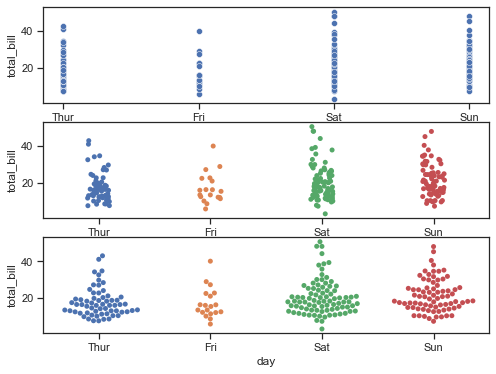

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

sns.scatterplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.swarmplot(data=tips, x="day", y="total_bill", ax=axes[2])

### Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

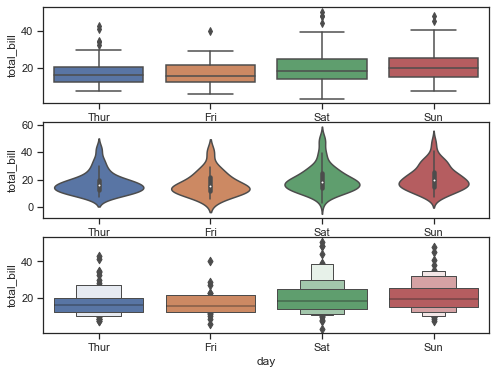

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.violinplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.boxenplot(data=tips, x="day", y="total_bill", ax=axes[2])

### Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

<AxesSubplot:xlabel='day', ylabel='count'>

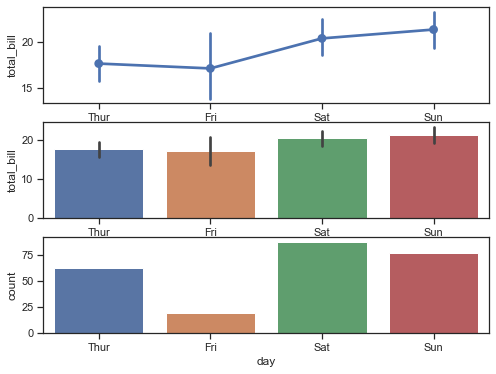

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

sns.pointplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.barplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.countplot(data=tips, x="day", ax=axes[2])

# Categorical scatterplots
## catplot = already have subplots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

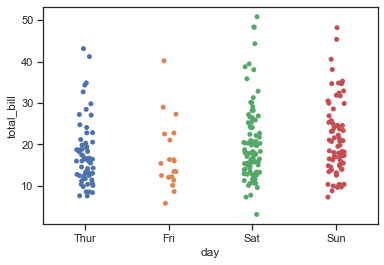

In [6]:
sns.stripplot(data=tips, x="day", y="total_bill")

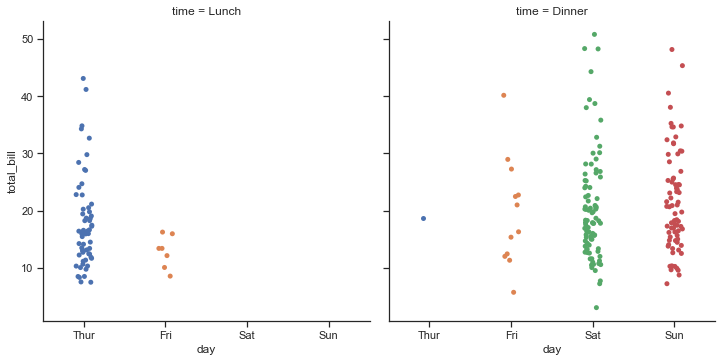

In [7]:
sns.catplot(data=tips, x="day", y="total_bill", col="time")

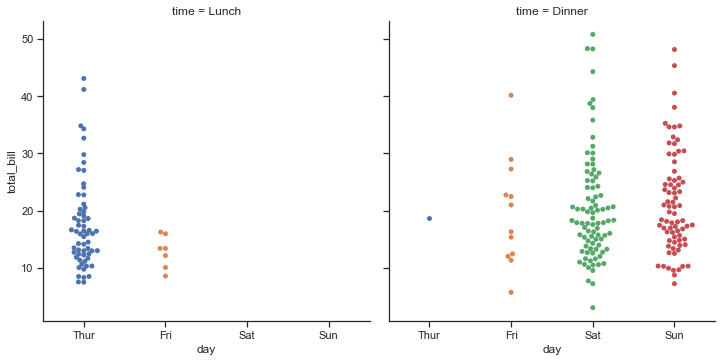

In [8]:
sns.catplot(data=tips, x="day", y="total_bill", col="time", kind="swarm")

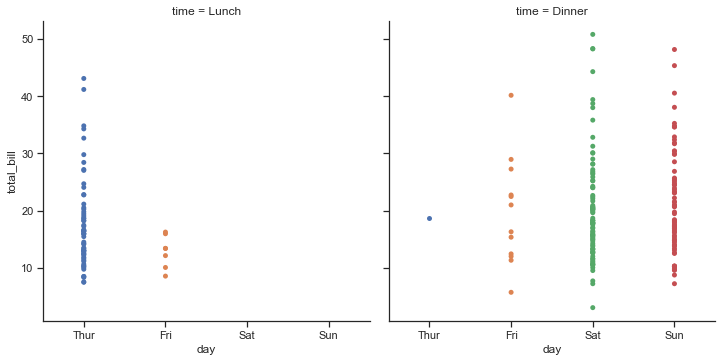

In [9]:
sns.catplot(data=tips, x="day", y="total_bill", col="time", jitter=False)

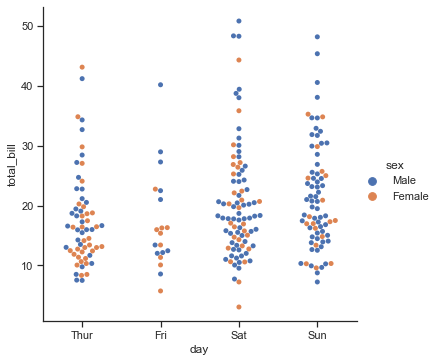

In [10]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

c:\users\owner\pydataenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


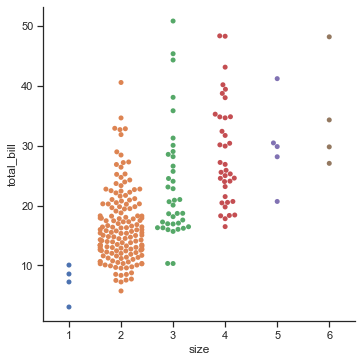

In [11]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

c:\users\owner\pydataenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


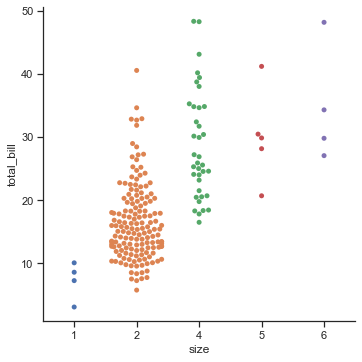

In [12]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips.query("size != 3"))

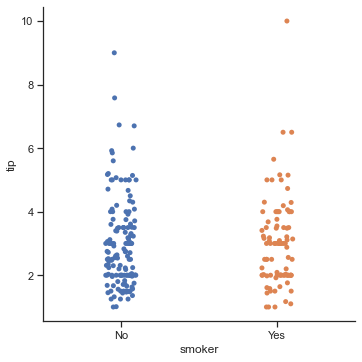

In [13]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

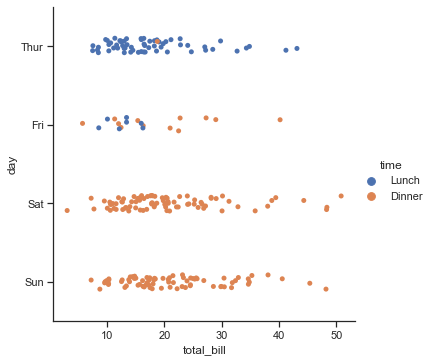

In [14]:
sns.catplot(x="total_bill", y="day", hue="time", data=tips)

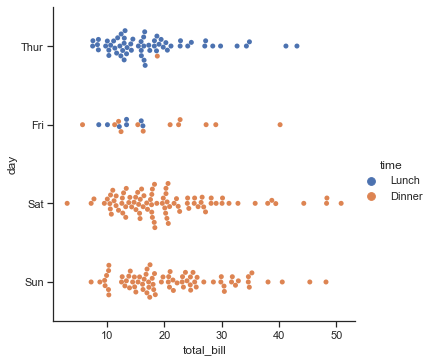

In [15]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

# Distributions of observations within categories

## Boxplots

In [16]:
group = tips.groupby("day")["total_bill"].describe()
group

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [17]:
Thur = group.loc["Thur"]
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [18]:
IQR = Thur["75%"]-Thur["25%"]
Thur_min = Thur["25%"] - (1.5 * IQR)
Thur_max = Thur["75%"] + (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 0.8737499999999958, 31.723750000000003)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

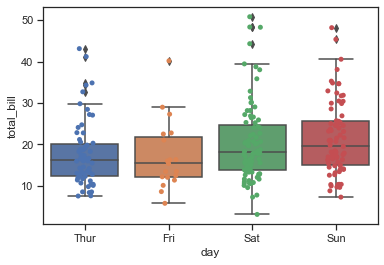

In [19]:
sns.stripplot(x="day", y="total_bill", data=tips)
sns.boxplot(x="day", y="total_bill", data=tips)

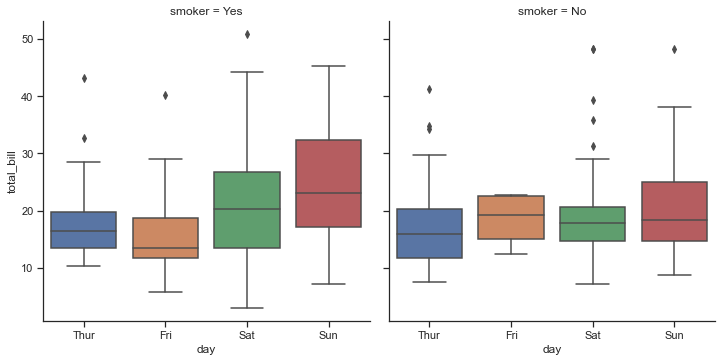

In [20]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips, col="smoker")

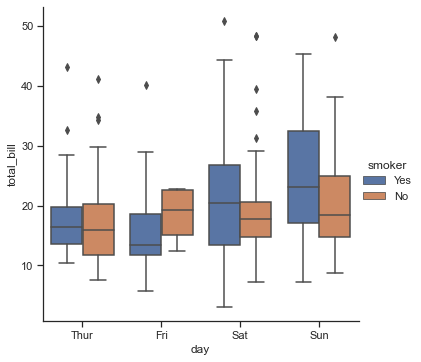

In [21]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips, hue="smoker")

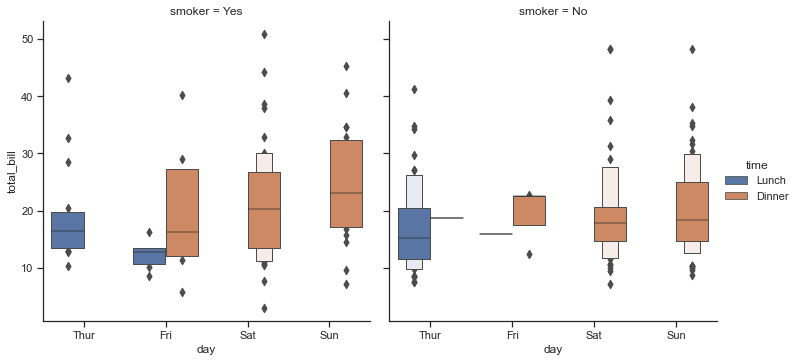

In [22]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips, col="smoker", hue="time")

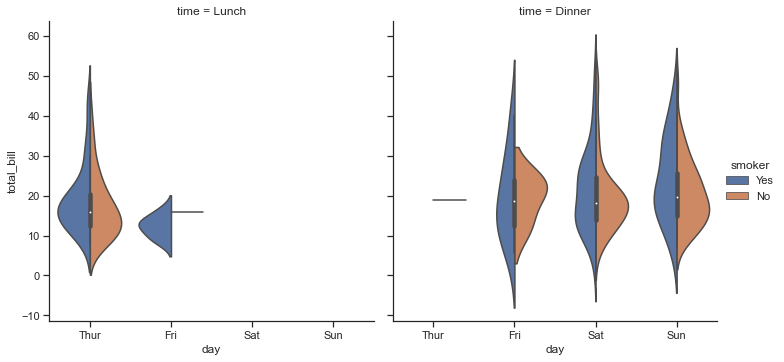

In [23]:
sns.catplot(x="day", y="total_bill", kind="violin",
            data=tips, col="time", hue="smoker", split=True)

In [24]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
tips

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,True
242,17.82,1.75,Male,No,Sat,Dinner,2,True


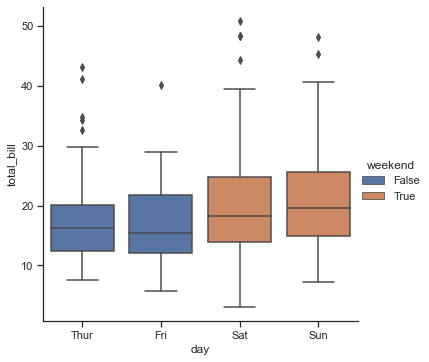

In [25]:
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

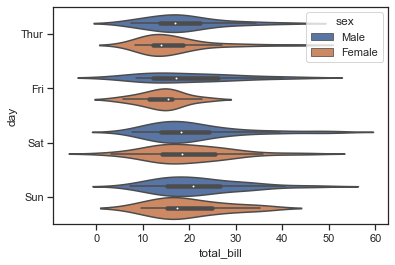

In [26]:
sns.violinplot(x="total_bill", y="day", hue="sex",
             data=tips)

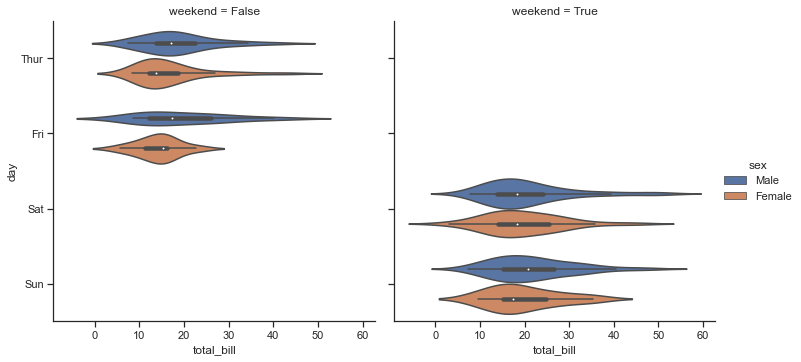

In [27]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips, col="weekend")

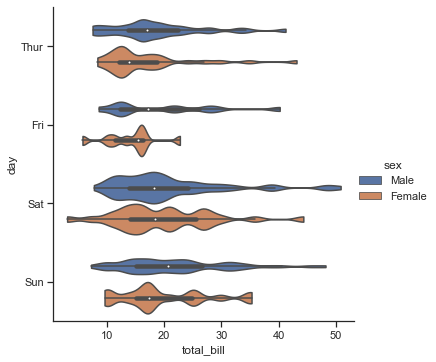

In [28]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

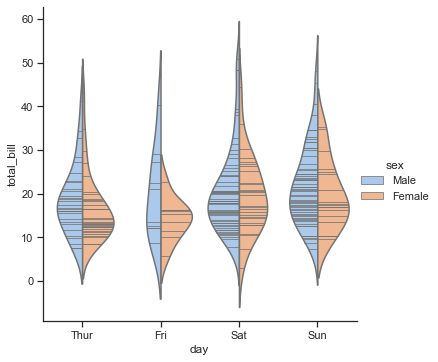

In [29]:
sns.catplot(x="day", y="total_bill", hue="sex", inner="stick", palette="pastel",
            kind="violin", split=True, data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

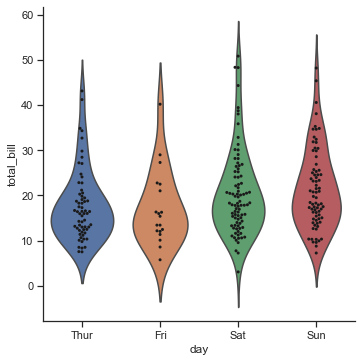

In [30]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

# Statistical estimation within categories

In [31]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* BarPlot

<AxesSubplot:xlabel='sex'>

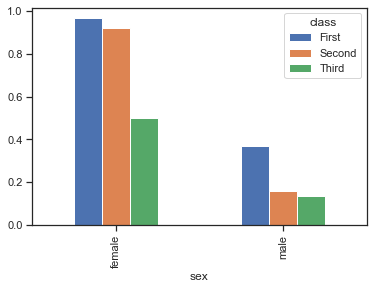

In [44]:
titanic_group = titanic.groupby(["sex","class"])["survived"].mean()
titanic_group = titanic_group.unstack()
titanic_group.plot.bar()

<AxesSubplot:xlabel='sex', ylabel='survived'>

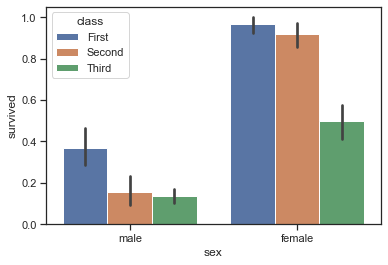

In [33]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

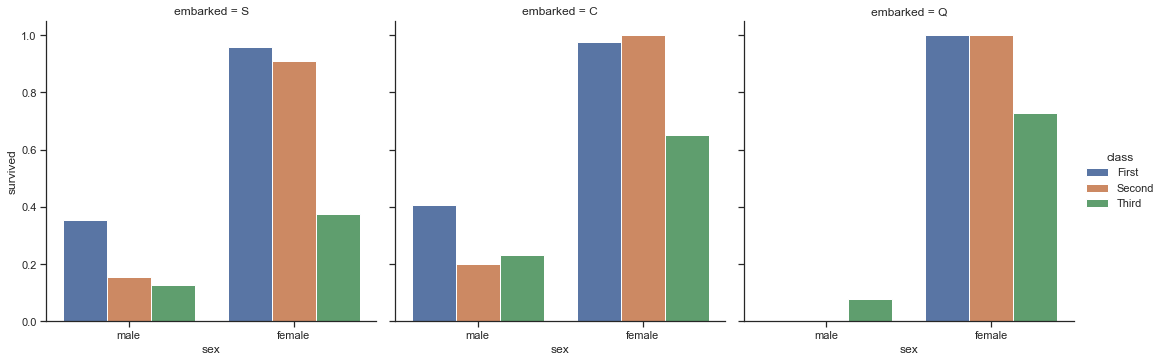

In [48]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar",
            col="embarked", data=titanic, ci=None)

* countPlot

<AxesSubplot:>

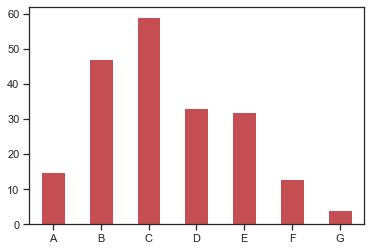

In [64]:
titanic["deck"].value_counts().sort_index().plot.bar(rot=0, color="r")

<AxesSubplot:xlabel='count', ylabel='deck'>

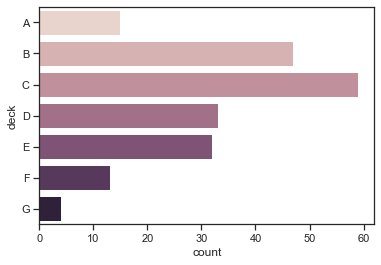

In [65]:
sns.countplot(y="deck", palette="ch:.05", data=titanic)

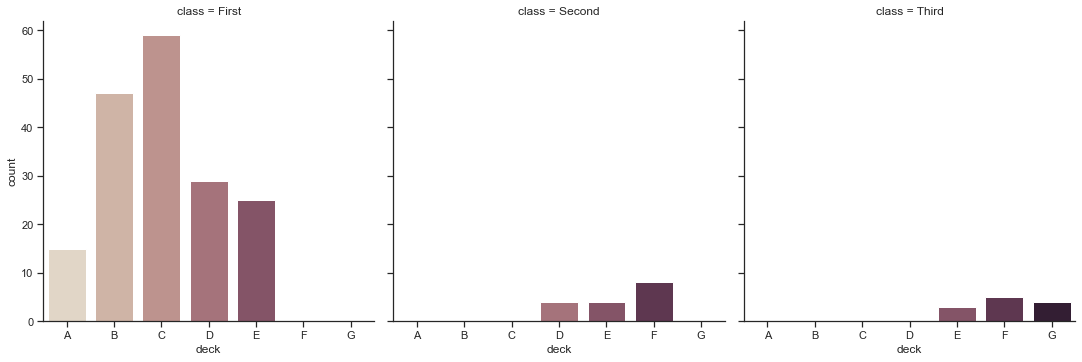

In [67]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic, col="class")

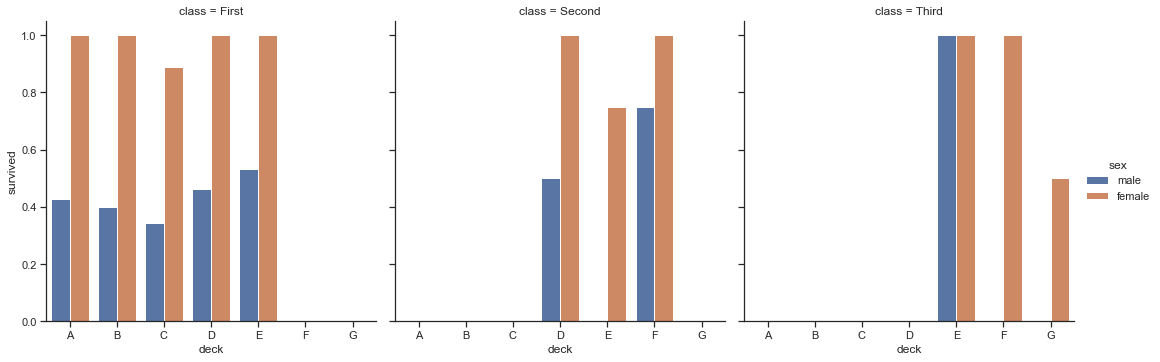

In [71]:
sns.catplot(x="deck", y="survived", kind="bar", hue="sex",
            col="class", data=titanic, ci=None)

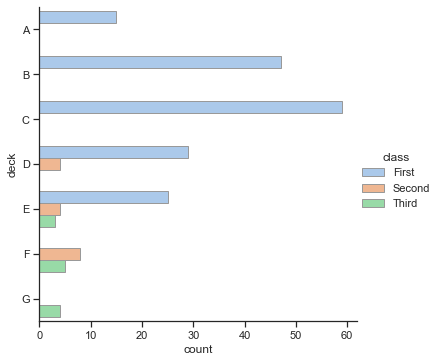

In [74]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

* PointPlot

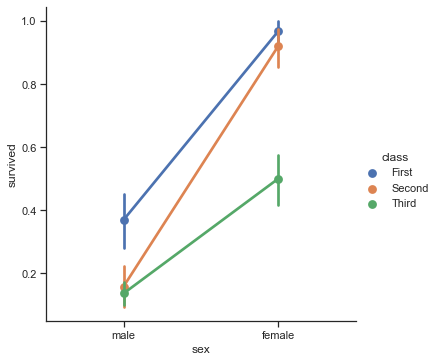

In [75]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

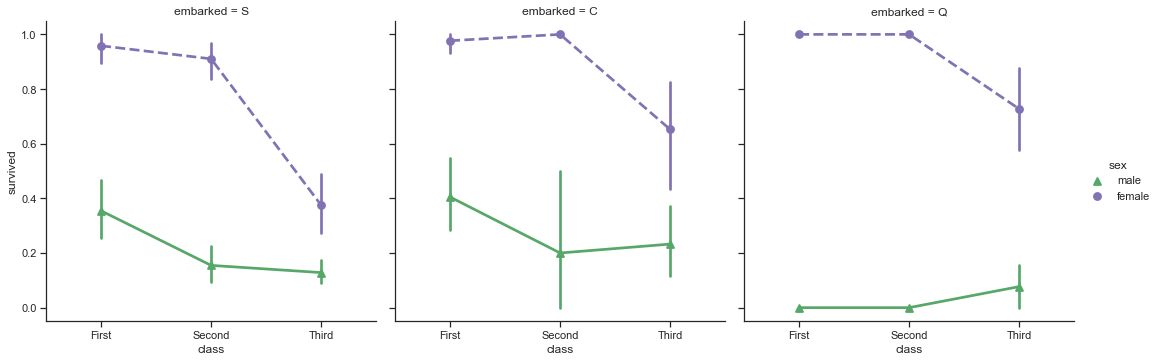

In [77]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic, col="embarked")

* Plotting “wide-form” data

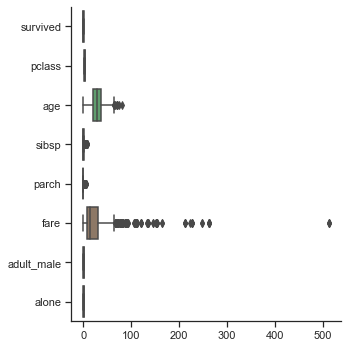

In [80]:
sns.catplot(data=titanic, orient="h", kind="box")

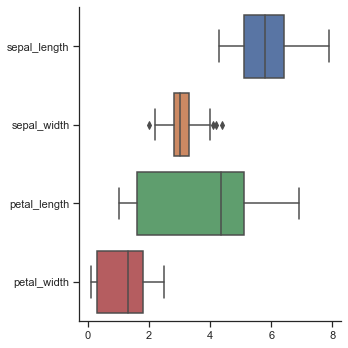

In [81]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

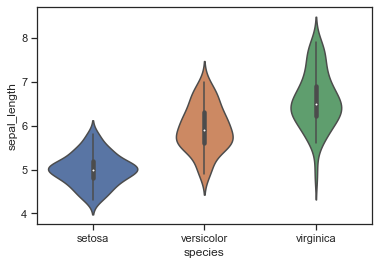

In [82]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

<AxesSubplot:xlabel='count', ylabel='deck'>

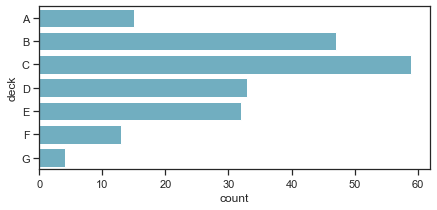

In [89]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

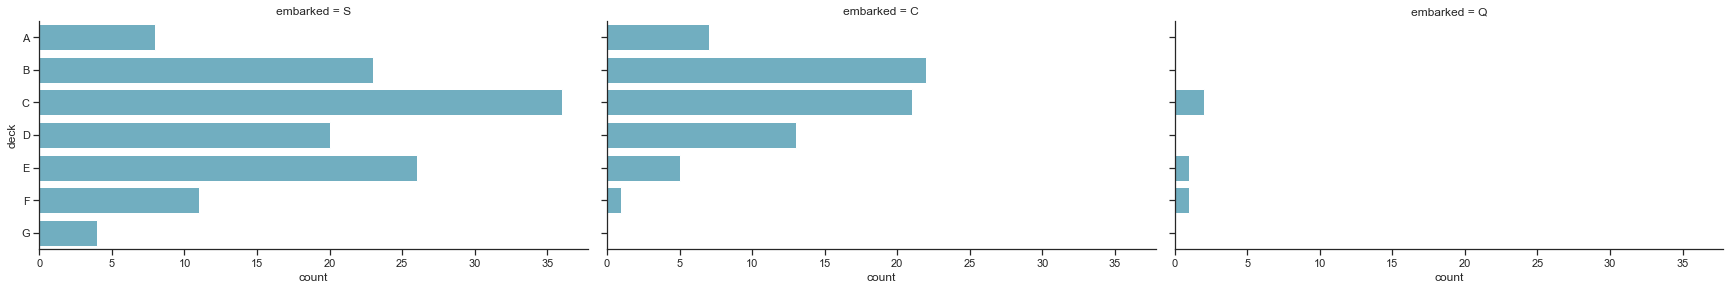

In [92]:
# f, ax = plt.subplots(figsize=(7, 3))
sns.catplot(y="deck", data=titanic, color="c", kind="count",
            height=4, aspect=2, col="embarked")

* Showing multiple relationships with facets

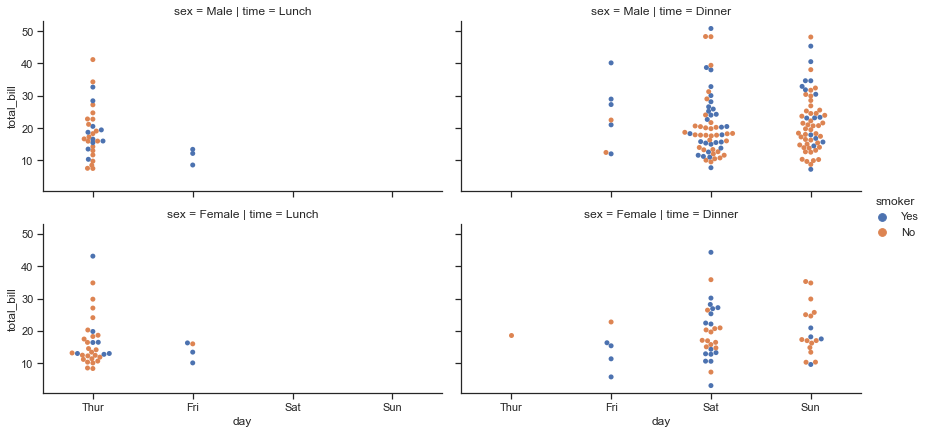

In [98]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", row="sex", aspect=2, height=3,
            kind="swarm", data=tips)

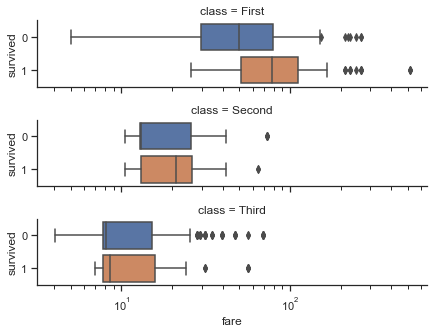

In [99]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")